## Boston municipal authorities 🚔⭐️🚔


### Advisory mission investigating  🔦:


**- Nature of crimes that take place in Boston**

**- Potential time trends identification**

**- Heterogeneity of the impact of criminality on the different police districts**


<img
    src="https://www.carscoops.com/wp-content/uploads/2021/12/Police-Car-1-1024x555.jpg"
    alt="Alternative text"
    width='50%'
/>


## Nature of crimes 🧐

In [58]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data import load_data_viz_data

In [73]:
# Haversine distance function
from math import radians, sin, cos, asin, sqrt

def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Compute distance (km) between two pairs of (lat, lng) coordinates
    See - (https://en.wikipedia.org/wiki/Haversine_formula)
    """
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    
    return 2 * 6371 * asin(sqrt(a))

In [74]:
data = load_data_viz_data()
data

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
...,...,...,...,...,...,...,...,...,...
237216,I172049757,Police investigation procedure,0,2018-08-09 18:00:00,42.355216,-71.060129,Charlestown,42.361800,-71.060300
237217,I172049757,Drugs and disorderly conduct,0,2018-08-09 18:00:00,42.355216,-71.060129,Charlestown,42.361800,-71.060300
237218,I172027369,Other,0,2018-12-12 05:00:00,42.376852,-71.068873,Charlestown,42.361800,-71.060300
237219,I172027369,Police investigation procedure,0,2018-12-12 05:00:00,42.376852,-71.068873,Charlestown,42.361800,-71.060300


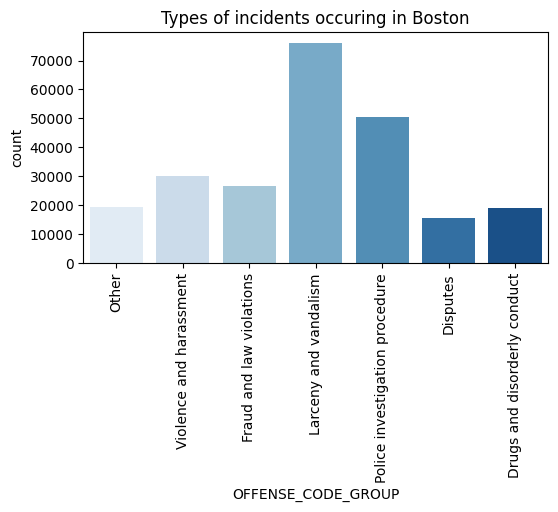

In [155]:
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

df = data.copy()

def most_common_category(categories):
    count = Counter(categories)
    return count.most_common(1)[0][0]

df_grouped = df.groupby('NAME').agg({'OFFENSE_CODE_GROUP': most_common_category})
df_grouped = df_grouped.rename(columns={'OFFENSE_CODE_GROUP': 'MOST_COMMON_CATEGORY'})

fig=plt.figure(figsize=(6,3), dpi= 100);
sns.countplot('OFFENSE_CODE_GROUP',data=data,palette='Blues');
plt.xticks(rotation=90);
plt.title('Types of incidents occuring in Boston');
plt.show();

## Time trends identification ⏰

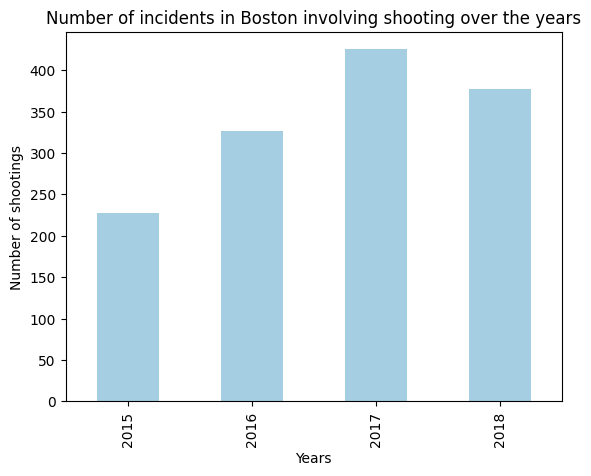

In [156]:
data['OCCURRED_ON_DATE'] = pd.to_datetime(data['OCCURRED_ON_DATE'])
data_copy = data.copy()
data_copy = data_copy.sort_values('OCCURRED_ON_DATE')
ax = data['SHOOTING'].groupby(data['OCCURRED_ON_DATE'].dt.to_period('Y')).sum().plot(kind='bar', colormap='Paired')

ax.set_xlabel('Years')
ax.set_ylabel('Number of shootings')
ax.set_title('Number of incidents in Boston involving shooting over the years');

In [134]:
data[['LAT','LONG']] = data[['LAT','LONG']].astype('float64')
data['DISTANCE_POLICE_STATION'] = data.apply(lambda x : haversine_distance(x['LONG'],x['LAT'],x['LONG_POLICE_STATION'],x['LAT_POLICE_STATION']),axis=1)

df_distance = data[['NAME','DISTANCE_POLICE_STATION']]

df_filtered = df_distance[df_distance['DISTANCE_POLICE_STATION'] < 500]
print(f'We are filtering out {df_distance.shape[0] - df_filtered.shape[0]} incidents that look like outliers')
d = df_filtered.groupby(['NAME'])['DISTANCE_POLICE_STATION'].mean()
data_distance = pd.DataFrame(d)
data_distance

We are filtering out 156 incidents that look like outliers


,DISTANCE_POLICE_STATION
NAME,
Brighton,1.314325
Charlestown,1.942568
Dorchester,1.373301
Downtown,0.859035
East Boston,1.204002
Hyde Park,1.723354
Jamaica Plain,1.263601
Mattapan,1.311324
Roxbury,1.465441


## Heterogeneity of the impact of criminality on the different police districts 🕵️‍♂️

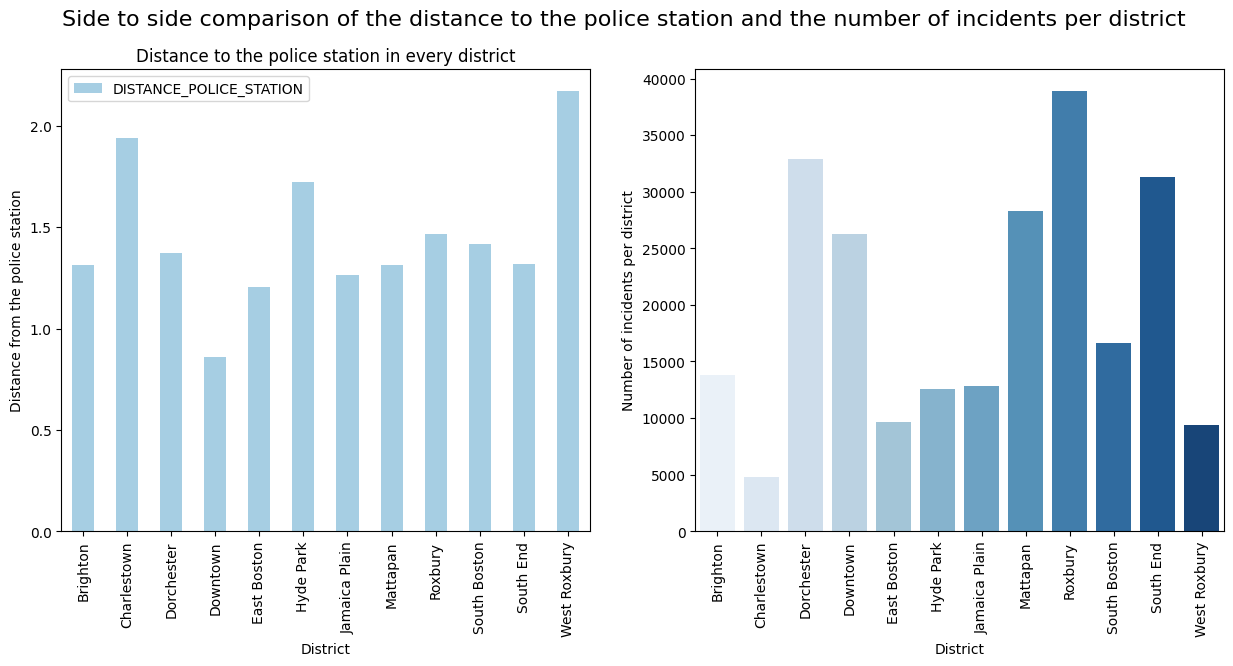

In [158]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
fig.suptitle('Side to side comparison of the distance to the police station and the number of incidents per district', fontsize=16);
data_distance.plot(kind='bar', colormap='Paired', title='Distance to the police station in every district', ax=ax1)
ax1.set_xlabel('District')
ax1.set_ylabel('Distance from the police station')

__ = data_distance.reset_index()
order = list(__['NAME'])

sns.countplot('NAME',data=data,palette='Blues',order=list(dataaa['NAME']))
plt.xticks(rotation=90)
ax2.set_xlabel('District')
ax2.set_ylabel('Number of incidents per district')
plt.show()

## Conclusion and projections moving forward

**Our exploration showed that :**

**- The most common categories of incidents are, in almost every district, the following :**

1 : Larceny and vandalism

2 : Police investigation procedure

**- Gun violence continually grew until 2017 but is starting to decrease since 2018, which is a good**
   **sign**

**- A bigger distance from a district to the police station doesn't seem to be particularly impactful on the number of   incidents**


Our advice to the  head of the Police Department of Boston would be to focus on mobile patrols that could potentially lower the high larceny in particular neighborhoods. We would recommend as well to focus the efforts on neighborhoods like Dorchester, Downtown, Mattapan, Roxbury, and South End.


Moving forward, we would like to explore the time of the day those incidents happen, to see if there is a difference during daytime and nightime, and see if we can do something about it. We would also look into the social economic background of the districts experiencing most troubles, to see if allocating more budget to public education, for exemple, could help us solving these issues mid-term.